In [1]:
import os
import numpy as np
import glob
import h5py
from itertools import product
import matplotlib.pyplot as plt

In [2]:
data_path = "c:/Users/capri28/Documents/ig2/igibson/data/demos/wsai"
vis = [f"{i}_{j}" for i in ["cataract", "amd", "glaucoma", "presbyopia", "myopia"] for j in [1, 2, 3]] + ["normal_1"]
tasks = ["catch", "navigate", "place", "slice", "throw", "wipe"]

### Completion time and success rate

In [3]:
npy_data = {}
for vi in vis:
    for task in tasks:
        npy_data[f"{task}_{vi}_success"] = np.load(glob.glob(rf"{data_path}/{task}/{vi}/*/success_list.npy")[0])
        npy_data[f"{task}_{vi}_time"] = np.load(glob.glob(rf"{data_path}/{task}/{vi}/*/completion_time.npy")[0])

In [4]:
npy_data

{'catch_cataract_1_success': array([0.8, 1. , 0.6, 0.8, 0.8]),
 'catch_cataract_1_time': array([24.31164455, 24.30309176, 24.30323958, 24.30850387, 24.29609489]),
 'navigate_cataract_1_success': array([ True,  True,  True,  True,  True]),
 'navigate_cataract_1_time': array([3.42792463, 6.2364707 , 2.19317913, 3.5251503 , 5.40319014]),
 'place_cataract_1_success': array([ True,  True,  True,  True,  True]),
 'place_cataract_1_time': array([13.87828851, 11.72891212,  6.80492878,  7.9302206 , 10.9648335 ]),
 'slice_cataract_1_success': array([ True,  True,  True,  True,  True]),
 'slice_cataract_1_time': array([3.77949262, 2.88883829, 2.68536758, 3.24788308, 4.80724406]),
 'throw_cataract_1_success': array([ True,  True, False, False,  True]),
 'throw_cataract_1_time': array([4.05696702, 3.16414046, 1.93023181, 3.45681143, 2.99053502]),
 'wipe_cataract_1_success': array([ True, False,  True,  True, False]),
 'wipe_cataract_1_time': array([ 9.47686934, 28.47377133, 10.40894675,  7.89573526

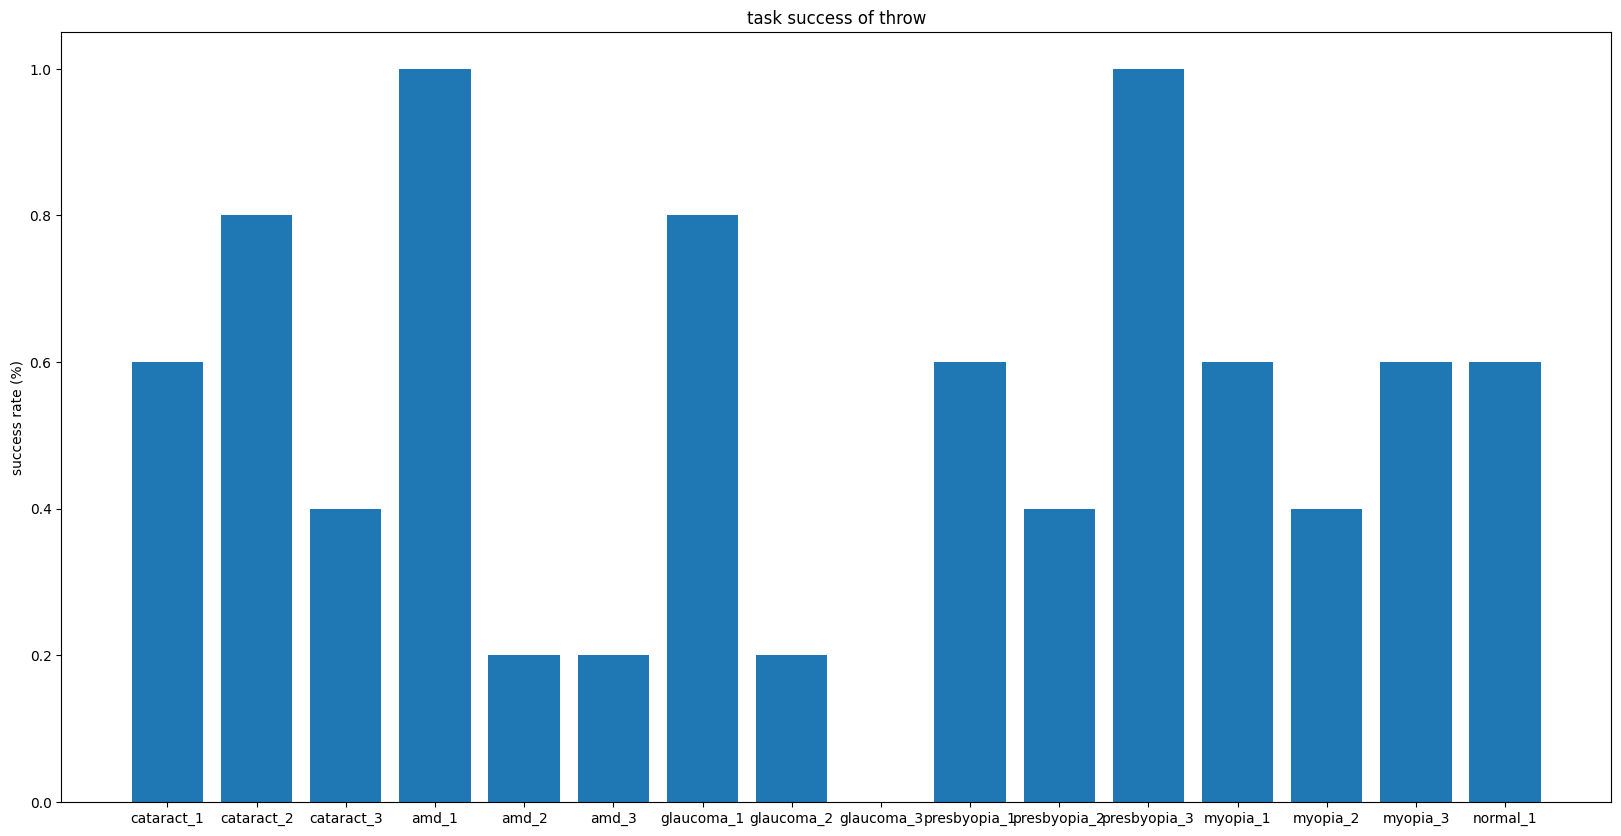

In [18]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.bar(range(len(vis)), [np.sum(npy_data[f"throw_{vi}_success"]) / 5 for vi in vis], tick_label=vis)
plt.title(f"task success of throw")
plt.ylabel("success rate (%)")
plt.show()

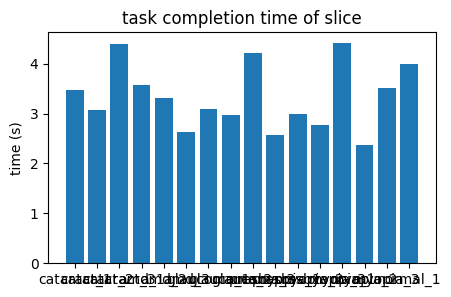

In [6]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.bar(range(len(vis)), [np.mean(npy_data[f"slice_{vi}_time"]) for vi in vis], tick_label=vis)
plt.title(f"task completion time of slice")
plt.ylabel("time (s)")
plt.show()

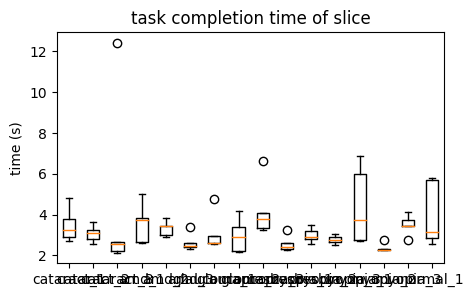

In [7]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.boxplot([npy_data[f"slice_{vi}_time"] for vi in vis], labels=vis)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title(f"task completion time of slice")
plt.ylabel("time (s)")
plt.show()

### HDF5 Device data

In [8]:
hfs = {}
for task in tasks:
    for vi in vis:
        for j in range(5):
            hfs[f"{task}_{vi}_{j}"] = h5py.File(glob.glob(rf"{data_path}/{task}/{vi}/*/{j}.hdf5")[0])

In [9]:
hfs

{'catch_cataract_1_0': <HDF5 file "0.hdf5" (mode r)>,
 'catch_cataract_1_1': <HDF5 file "1.hdf5" (mode r)>,
 'catch_cataract_1_2': <HDF5 file "2.hdf5" (mode r)>,
 'catch_cataract_1_3': <HDF5 file "3.hdf5" (mode r)>,
 'catch_cataract_1_4': <HDF5 file "4.hdf5" (mode r)>,
 'catch_cataract_2_0': <HDF5 file "0.hdf5" (mode r)>,
 'catch_cataract_2_1': <HDF5 file "1.hdf5" (mode r)>,
 'catch_cataract_2_2': <HDF5 file "2.hdf5" (mode r)>,
 'catch_cataract_2_3': <HDF5 file "3.hdf5" (mode r)>,
 'catch_cataract_2_4': <HDF5 file "4.hdf5" (mode r)>,
 'catch_cataract_3_0': <HDF5 file "0.hdf5" (mode r)>,
 'catch_cataract_3_1': <HDF5 file "1.hdf5" (mode r)>,
 'catch_cataract_3_2': <HDF5 file "2.hdf5" (mode r)>,
 'catch_cataract_3_3': <HDF5 file "3.hdf5" (mode r)>,
 'catch_cataract_3_4': <HDF5 file "4.hdf5" (mode r)>,
 'catch_amd_1_0': <HDF5 file "0.hdf5" (mode r)>,
 'catch_amd_1_1': <HDF5 file "1.hdf5" (mode r)>,
 'catch_amd_1_2': <HDF5 file "2.hdf5" (mode r)>,
 'catch_amd_1_3': <HDF5 file "3.hdf5" (mode

In [10]:
data = {}
for hf in hfs:
    data[hf] = np.array(hfs[hf]["vr"]["vr_device_data"]["right_controller"])

In [11]:
data["wipe_normal_1_0"]

array([[ 1.00000000e+00,  2.08270550e-01, -1.83715820e-01, ...,
        -2.06088357e+00,  6.81465483e-01,  7.07307121e+00],
       [ 1.00000000e+00,  2.07992435e-01, -1.84189796e-01, ...,
         9.50911261e+00,  6.70220276e-03,  3.26401929e+00],
       [ 1.00000000e+00,  2.07350969e-01, -1.84258223e-01, ...,
         1.90520504e+01, -7.74507336e-01,  5.10133667e+00],
       ...,
       [ 1.00000000e+00, -6.20067120e-02, -2.75728703e-01, ...,
        -2.34035340e+00, -7.15782902e-01, -6.13817942e+00],
       [ 1.00000000e+00, -7.05888271e-02, -2.66879320e-01, ...,
        -2.33505846e+00, -7.11160390e-01, -6.05282863e+00],
       [ 1.00000000e+00, -7.73460865e-02, -2.58538961e-01, ...,
        -2.20261829e+00, -6.55178842e-01, -5.57036393e+00]])

In [16]:
dist = {}
for vi in vis:
    dist[vi] = []
    for j in range(5):
        cond = f"wipe_{vi}_{j}"
        dist[vi].append(np.sum(np.linalg.norm(data[cond][:, 4:7][1:] - data[cond][:, 4:7][:-1], axis=1)))

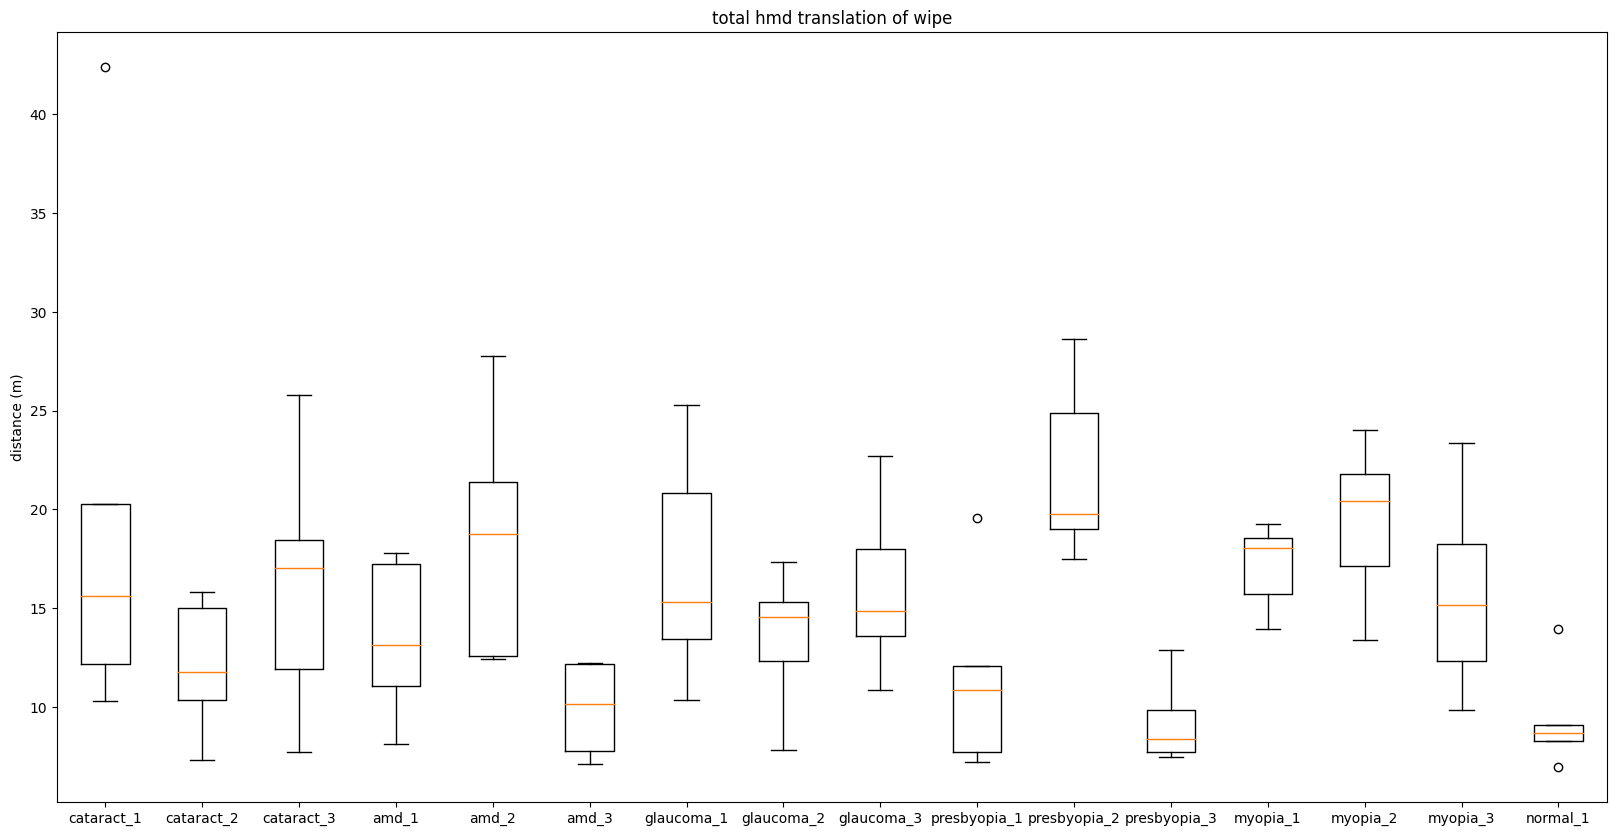

In [17]:
plt.boxplot([dist[vi] for vi in vis], labels=vis)
plt.title(f"total hmd translation of wipe")
plt.ylabel("distance (m)")
plt.show()

In [14]:
data = [x[0] for x in hf["total_movement_of_irrelavant_objs"]]
plt.plot(data)
plt.title("total move of irrelavant objects")
plt.show()

TypeError: string indices must be integers

Text(0.5, 1.0, 'right controller trigger')

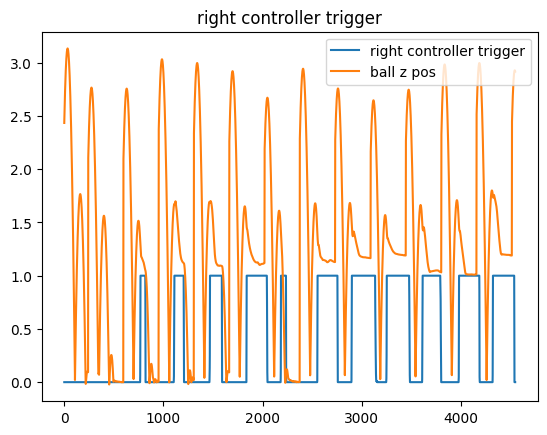

In [ ]:
plt.plot(hf["vr"]["vr_button_data"]["right_controller"][:, 0], label="right controller trigger")
plt.plot(hf["physics_data"]["1"]["position"][:, 2], label="ball z pos")
plt.legend()
plt.title("right controller trigger")

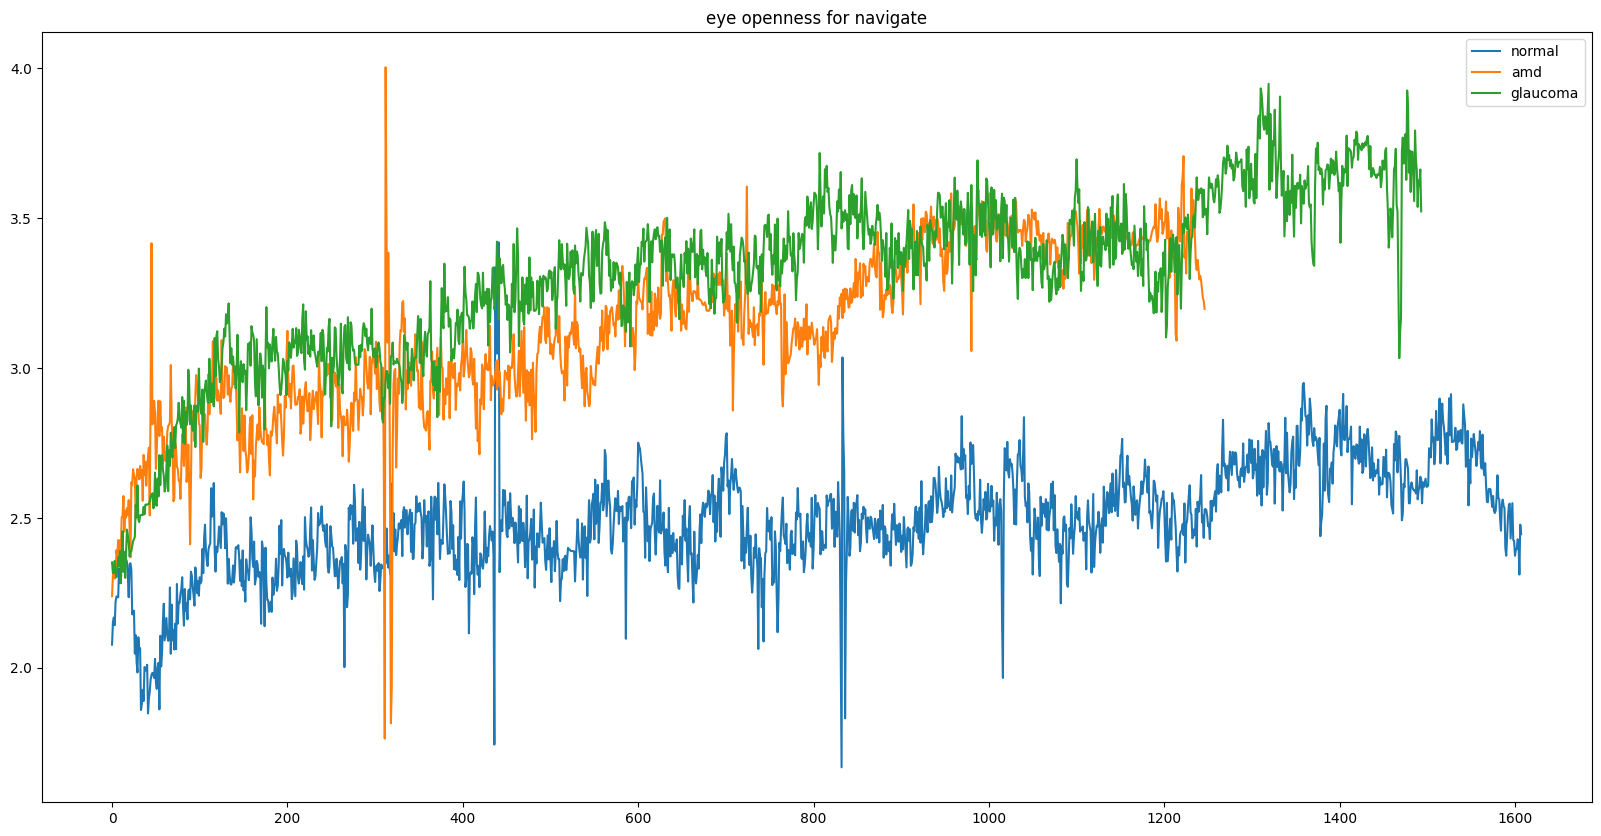

In [ ]:
right_eye_openess_data = {}
for hf in hfs:
    right_eye_openess_data[hf] = np.array(hfs[hf]["vr"]["vr_eye_tracking_data"][:, -1])
    right_eye_openess_data[hf] = right_eye_openess_data[hf][right_eye_openess_data[hf] > 0]
plt.plot(right_eye_openess_data["navigate_normal_1_0"], label="normal")
plt.plot(right_eye_openess_data["navigate_amd_3_4"], label="amd")
plt.plot(right_eye_openess_data["navigate_glaucoma_3_0"], label="glaucoma")
plt.legend()
plt.title("eye openness for navigate")
plt.show()

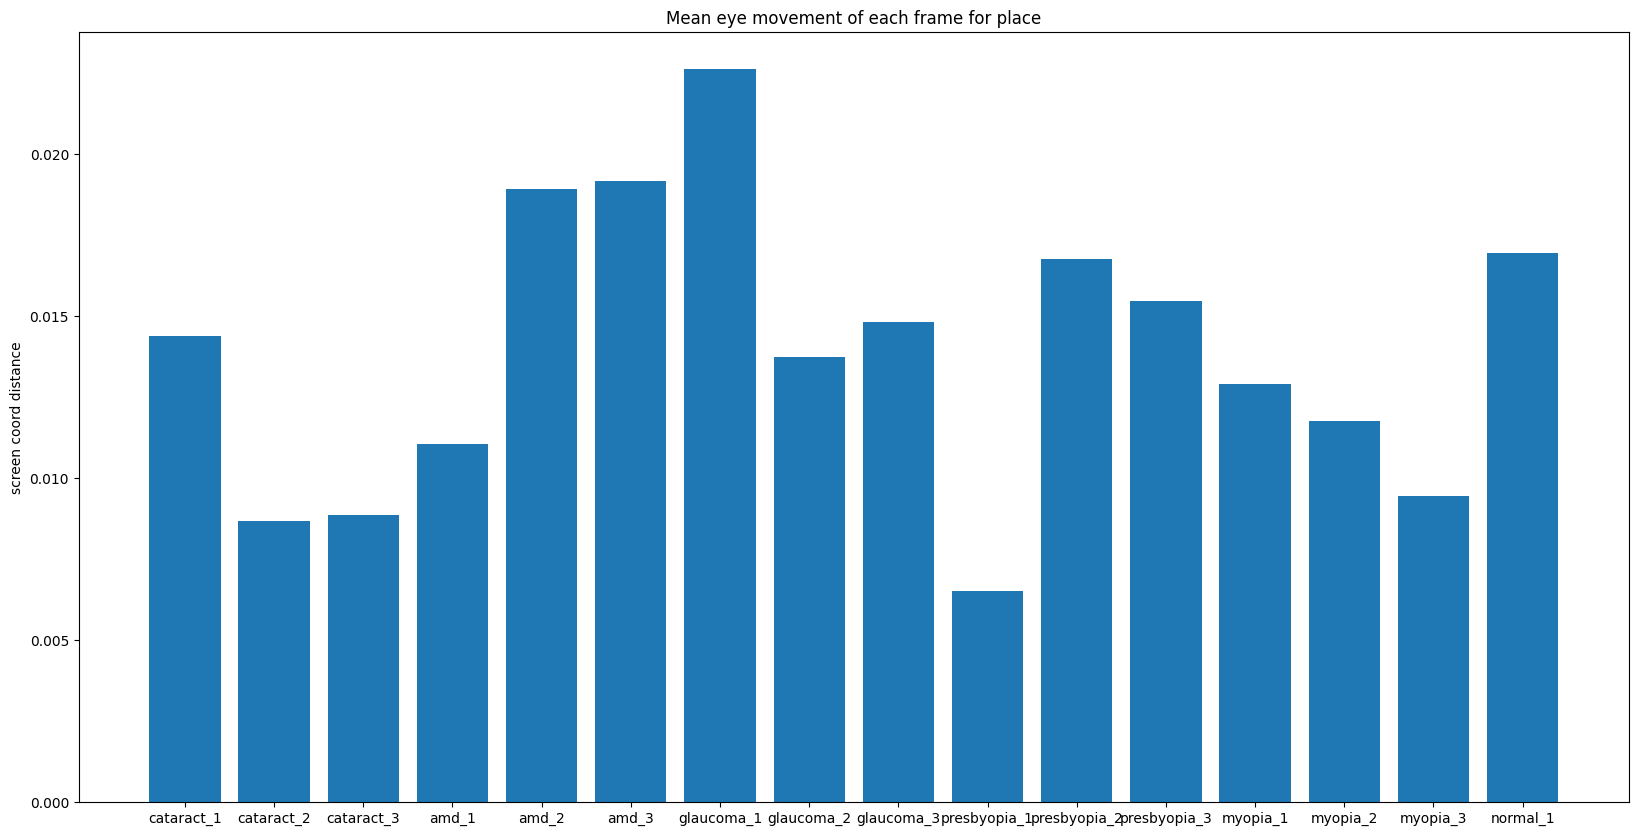

In [ ]:
eye_screen_pos_data = {}
for vi in vis:
    key = f"place_{vi}"
    eye_screen_pos_data[key] = {}
    for i in range(5):
        eye_screen_pos_data[key][i] = np.array(hfs[f"{key}_{i}"]["vr"]["vr_eye_tracking_data"][:, 7:9])
    # right_eye_screen_pos_data[hf] = right_eye_screen_pos_data[hf][right_eye_screen_pos_data[hf]]
        eye_screen_pos_data[key][i] = np.mean(np.linalg.norm(eye_screen_pos_data[key][i][1:] - eye_screen_pos_data[key][i][:-1], axis=1))

plt.bar(range(len(vis)), [np.mean([eye_screen_pos_data[key][i] for i in range(5)]) for key in eye_screen_pos_data], tick_label=vis)
plt.title("Mean eye movement of each frame for place")
plt.ylabel("screen coord distance")
plt.show()

In [ ]:
for h in hfs.values():
       if h.__bool__():
              h.close()